### Student Information
Name: 趙仰生

Student ID: 106062132

GitHub ID: 106062132

Kaggle name: Chao Yang Sheng

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

# First part

source code

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)





---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)




[('the', 1736), ('to', 1289), ('and', 955), ('you', 796), ('of', 793), ('is', 787), ('it', 717), ('in', 626), ('that', 537), ('my', 535), ('for', 446), ('on', 390), ('be', 383), ('me', 380), ('this', 350), ('so', 328), ('have', 312), ('not', 303), ('just', 301), ('but', 293), ('with', 288), ('at', 269), ('can', 257), ('like', 243), ('all', 243), ('are', 231), ('your', 229), ('was', 228), ('when', 226), ('if', 216)]


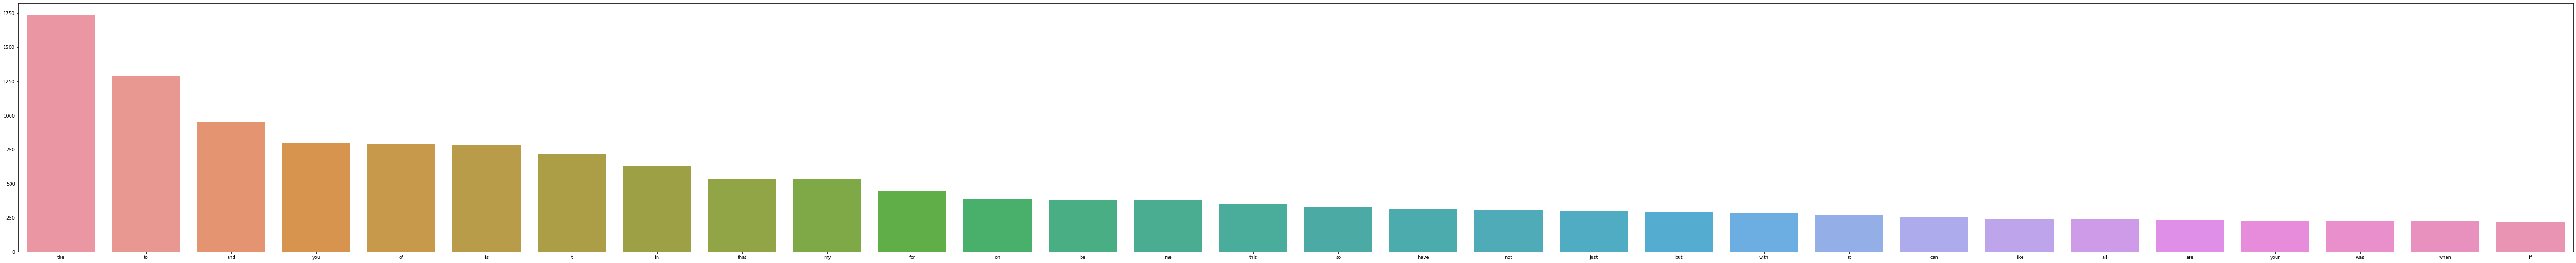

In [3]:
#train
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(train_df.text)
sum_words = X_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq[0:30])
x_array = []
y_array = []
for i in range(30):
    x_array.append(words_freq[i][0])
    y_array.append(words_freq[i][1])
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=x_array, y=y_array)

[('the', 153), ('to', 138), ('and', 92), ('of', 83), ('it', 83), ('you', 82), ('is', 77), ('in', 69), ('for', 57), ('that', 55), ('my', 52), ('on', 46), ('be', 40), ('me', 36), ('so', 34), ('was', 34), ('can', 32), ('have', 30), ('all', 30), ('at', 30), ('with', 29), ('just', 29), ('are', 29), ('but', 26), ('get', 26), ('up', 24), ('this', 24), ('your', 24), ('not', 24), ('like', 24)]


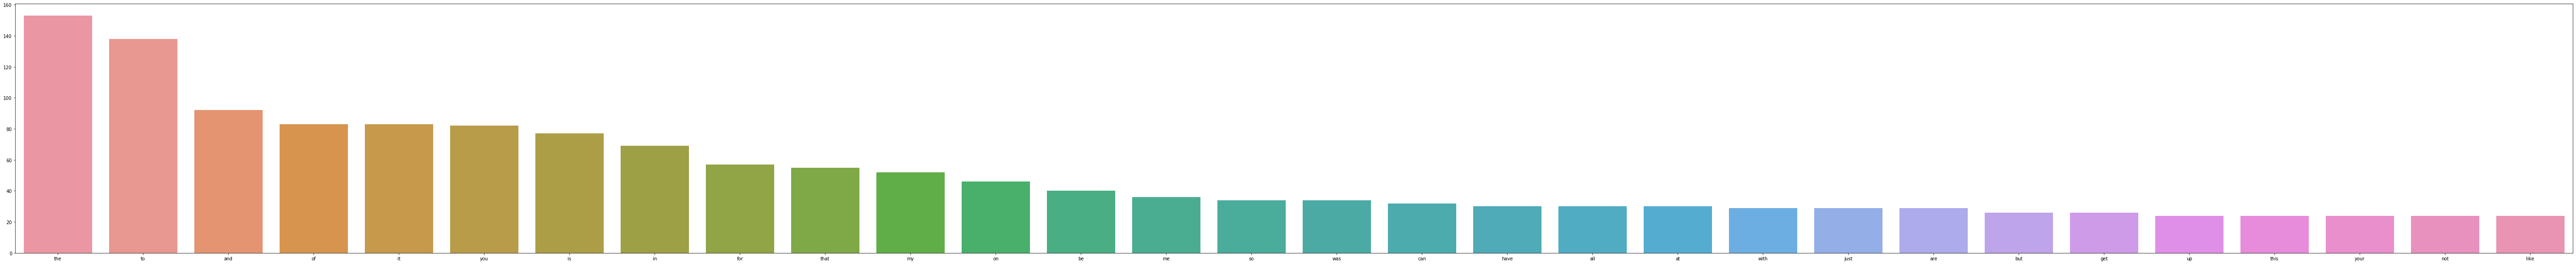

In [4]:
#test
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(test_df.text)
sum_words = X_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq[0:30])
x_array = []
y_array = []
for i in range(30):
    x_array.append(words_freq[i][0])
    y_array.append(words_freq[i][1])
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=x_array, y=y_array)

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)  
tmp = vectorizer.fit_transform(train_df.text)
vectorizer.get_feature_names()[100:110]

['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

# Answer here
First, we can see that the model tends to predict wrong on fear and anger ->   
it may indicate that the use of the words from these two emotions sometimes are not easy to distinguish  
Second, the model tends to predict wrong when the case is related to sadness ->   
the true label of the case is sadness or the model predicts it as sadness.  
Overall, we can utilize some standard such as f1-score to analyze confusion matrix or observe it directly like what I have done above.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [6]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import nltk
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
BOW_500.fit(train_df['text'])

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_train_pred = gnb.predict(X_train.toarray())
y_test_pred = gnb.predict(X_test.toarray())
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))




//anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


training accuracy: 0.77
testing accuracy: 0.67


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

# Answer here
Decision Tree -> training accuracy: 0.99, testing accuracy: 0.64  
Naive Bayes -> training accuracy: 0.77, testing accuracy: 0.67  
We can see that DT has higher training accuracy but it has lower testing accuracy, which means it overfits the training dataset.  
As NB, although it has lower training accuracy, but it has higher testing accuracy.  
However, both models are not accurate enough.

In [7]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)
# I/O check
input_shape = X_train.shape[1]

output_shape = len(label_encoder.classes_)

from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))

Epoch 1/25
113/113 [==============================] - 0s 4ms/step - loss: 1.3257 - accuracy: 0.3673 - val_loss: 1.2792 - val_accuracy: 0.4380
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 0.9603 - accuracy: 0.6612 - val_loss: 0.9243 - val_accuracy: 0.6686
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.5648 - accuracy: 0.7996 - val_loss: 0.8129 - val_accuracy: 0.7118
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8530 - val_loss: 0.7825 - val_accuracy: 0.7176
Epoch 5/25
113/113 [==============================] - 0s 1ms/step - loss: 0.3237 - accuracy: 0.8802 - val_loss: 0.8283 - val_accuracy: 0.7147
Epoch 6/25
113/113 [==============================] - 0s 1ms/step - loss: 0.2723 - accuracy: 0.9109 - val_loss: 0.8765 - val_accuracy: 0.6945
Epoch 7/25
113/113 [==============================] - 0s 1ms/step - loss: 0.2212 - accuracy: 0.9225 - val_loss: 0.9397 - val_accuracy: 0.6830
Epoch 

In [8]:
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.367285,1.325706,0.438040,1.279243
1,1,0.661223,0.960297,0.668588,0.924295
2,2,0.799613,0.564844,0.711816,0.812858
3,3,0.853031,0.404371,0.717579,0.782537
4,4,0.880155,0.323736,0.714697,0.828308
5,5,0.910877,0.272345,0.694524,0.876538
6,6,0.922502,0.221221,0.682997,0.939736
7,7,0.935234,0.189924,0.674352,0.976538
8,8,0.951287,0.160420,0.674352,1.068467
9,9,0.955992,0.141205,0.677233,1.086413


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

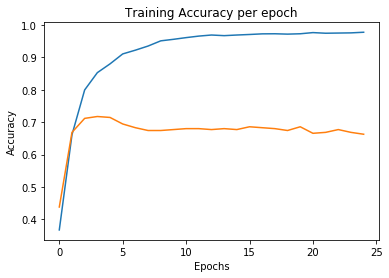

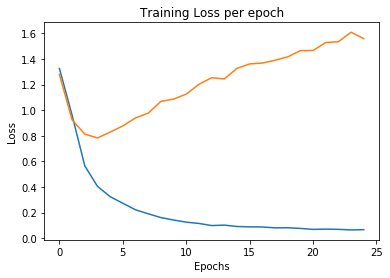

In [9]:
# Answer here
plt.plot(training_log.accuracy)
plt.plot(training_log.val_accuracy)
plt.title('Training Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

plt.plot(training_log.loss)
plt.plot(training_log.val_loss)
plt.title('Training Loss per epoch')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

We can see that epoch3 has the lowest validation loss.  
Before epoch3, we view the period as underfitting, which means both the training loss and validation loss are not low enough.  
After epoch3, the validation loss is getting higher, which mean that the model is encountering overfitting.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?




# Answer here
Average of Word2Vec vectors with TF-IDF : this is one of the best approach. Just take the word vectors and multiply it with their TF-IDF scores. And then take the average and it will represent the sentence vector.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

I use glove_twitter_25_model instead.

load ok
happy_words:  ['happy', 'birthday', 'thank', 'welcome', 'love', 'miss', 'hello', 'thanks', 'merry', 'bless', 'wish', 'day', 'dear', 'morning', 'good']
angry_words:  ['angry', 'stupid', 'hate', 'annoying', 'weird', 'like', 'confused', 'fucking', 'people', 'dislike', 'awkward', 'reason', 'because', 'scary', 'seriously']
data_words:  ['data', 'mobile', 'software', 'search', 'survey', 'web', 'server', 'marketing', 'file', 'system', 'google', 'resume', 'unit', 'network', 'panel']
mining_words:  ['mining', 'offshore', 'manufacturing', 'pharma', 'agricultural', 'agriculture', 'housing', 'petroleum', 'pipeline', 'infrastructure', 'aviation', 'export', 'biotech', 'pharmaceutical', 'coal']

target words: 
['happy', 'birthday', 'thank', 'welcome', 'love', 'miss', 'hello', 'thanks', 'merry', 'bless', 'wish', 'day', 'dear', 'morning', 'good', 'angry', 'stupid', 'hate', 'annoying', 'weird', 'like', 'confused', 'fucking', 'people', 'dislike', 'awkward', 'reason', 'because', 'scary', 'seriousl

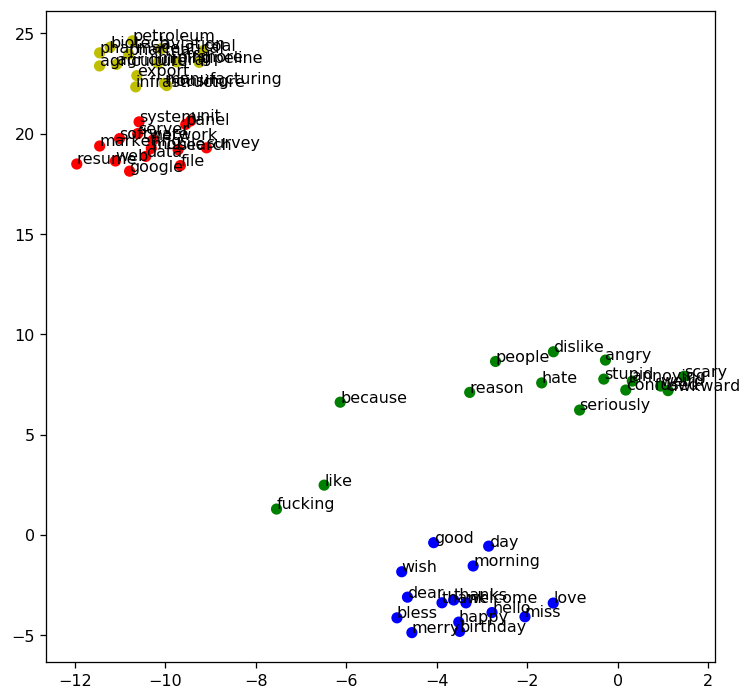

In [10]:
# Answer here
import gensim.downloader as api
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context
glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

word_list = ['happy', 'angry', 'data', 'mining']
topn = 14
happy_words = ['happy'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = glove_twitter_25_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Third Part

Fisrt, I read the data as pandas dataframe and only keep the text and tweet_id

In [ ]:
import pandas as pd
df = pd.read_csv("data_identification.csv")
df2 = pd.read_csv("emotion.csv")
df3 = pd.read_csv("sampleSubmission.csv")
df4 = pd.read_json("tweets_DM.json", lines=True)
df4['text'] = df4._source.apply(lambda x:x['tweet']['text'])
df4['tweet_id'] = df4._source.apply(lambda x:x['tweet']['tweet_id'])
df4 = df4[['text','tweet_id']]

And split the data into training and testing set

In [ ]:
answer_df = df[df['identification'] == 'test']
answer_df = answer_df.merge(df4,how="inner",on=['tweet_id'])
answer_df = answer_df.drop(columns=['identification'])
x_answer = answer_df['text']
train_df = df[df['identification'] == 'train']
train_df = train_df.merge(df2,how="inner",on=['tweet_id'])
train_df = train_df.merge(df4,how="inner",on=['tweet_id'])
train_df = train_df.drop(columns=['identification'])

Then, using TfidfVectorizer and TweetTokenizer to transform those data into vector.  
Note : The matrix is sparse, we need to transform them into dense for Keras.

In [ ]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
vectorizer = TfidfVectorizer(max_features=6000, tokenizer=tknzr.tokenize)  
vectorizer.fit(train_df['text'])
X_train = train_df['text']
X_train = vectorizer.transform(X_train)
X_train = X_train.todense()
X_answer = vectorizer.transform(x_answer)
X_answer = X_answer.todense()

 Using LabelEncoder to label the ground truth. 

In [ ]:
y_train = train_df['emotion']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(y_train.unique()))
y_train = le.transform(y_train)

Training the NN based model under Keras(just like what we have learned in lab), but tune the parameters and also make the network structure as tower type(extract the low level feature to high level feature).

In [ ]:
import keras

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train_enc = label_encode(label_encoder, y_train)
# I/O check
input_shape = X_train.shape[1]

output_shape = len(label_encoder.classes_)

from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 6000
X = model_input

# 1st hidden layer
X_W1 = Dense(units=2048)(X)  #2048
H1 = ReLU()(X_W1)

X_Wz = Dense(units=1024)(H1)  # 1024
Hz = ReLU()(X_Wz)

H1_Wa = Dense(units=512)(Hz)  # 512
Ha = ReLU()(H1_Wa)

H1_Wb = Dense(units=256)(Ha)  # 256
Hb = ReLU()(H1_Wb)

H1_Wc = Dense(units=128)(Hb)  # 128
Hc = ReLU()(H1_Wc)

# 2nd hidden layer
H1_W2 = Dense(units=64)(Hc)  # 64
H2 = ReLU()(H1_W2)

X_Wx = Dense(units=32)(H2)  # 32
Hx = ReLU()(X_Wx)

X_Wy = Dense(units=16)(Hx)  # 16
Hy = ReLU()(X_Wy)


# output layer
H2_W3 = Dense(units=output_shape)(Hy)  # 8
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# training setting
epochs = 3
batch_size = 32

from sklearn.model_selection import train_test_split
a,b,c,d = train_test_split(X_train,y_train_enc,test_size=0.05)

# training!
history = model.fit(a,c, 
                    epochs=epochs, 
                    batch_size=batch_size,
                   validation_data=(b,d))

Predict the testing data and output it as submission.csv

In [ ]:
aa = model.predict(X_answer)
aa = aa.tolist()
y_answer = []
for i in range(len(aa)):
    y_answer.append(aa[i].index(max(aa[i])))
answer_df = answer_df.drop(columns=['text'])
answer_df['emotion'] = list(le.inverse_transform(list(map(int, y_answer))))
answer_df = answer_df.rename(columns={"tweet_id": "id"})
answer_df.to_csv("submission.csv",index=False)

Thank you so much!